# Iterative modeling process
Importing our functions, loading in our images, train test splitting and one hot encoding them

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/ColabNotebooks/Emoition-classification-from-facial-expression

/content/drive/MyDrive/ColabNotebooks/Emoition-classification-from-facial-expression


In [6]:
pip install keract


In [7]:
from Functions import *
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


In [8]:
filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names)
im=df['pixels']
df.head(10)
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)
N, D = X.shape
X = X.reshape(N, 48, 48, 1)
cascade = load_cascade_classifier_xml()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)
Y = (np.arange(num_class) == Y[:, None]).astype(np.float32)



7
(35887, 48, 48, 1)


In [9]:
picdict = pkl.load(open('picdict2.pkl','rb'))
visx = []
visy = []
for label, pic in picdict.items():
  visx.append(pic)
  visy.append(label)
  

The first model that I started out with was pretrained and upon looking at its activations it seemed to not detect the characteristics of the expressions it was predicting. 

In [10]:
model = Sequential()
input_shape = (48,48,1)
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [12]:
model.load_weights('firstmodel')

In [13]:
# model.save_weights('firstmodel')

['conv2d', 'conv2d_1', 'max_pooling2d', 'conv2d_2', 'conv2d_3', 'max_pooling2d_1', 'conv2d_4', 'conv2d_5', 'max_pooling2d_2']


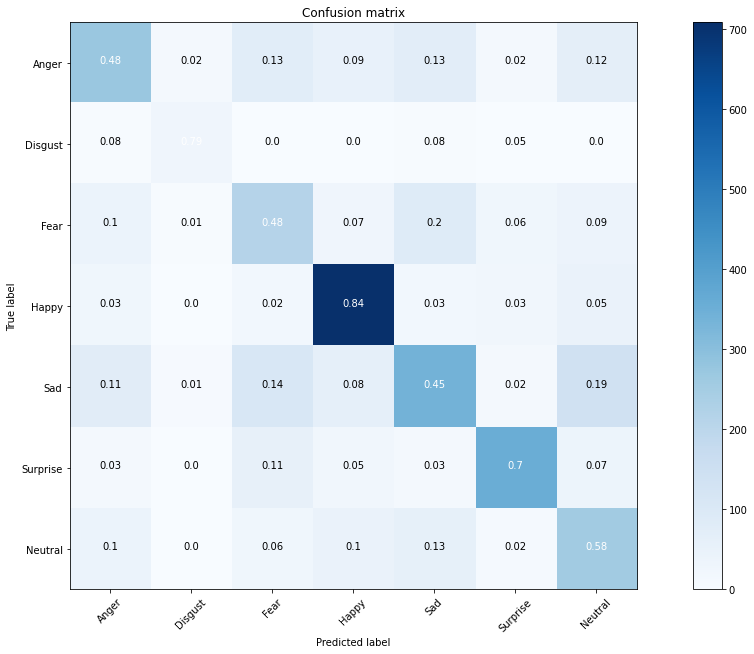

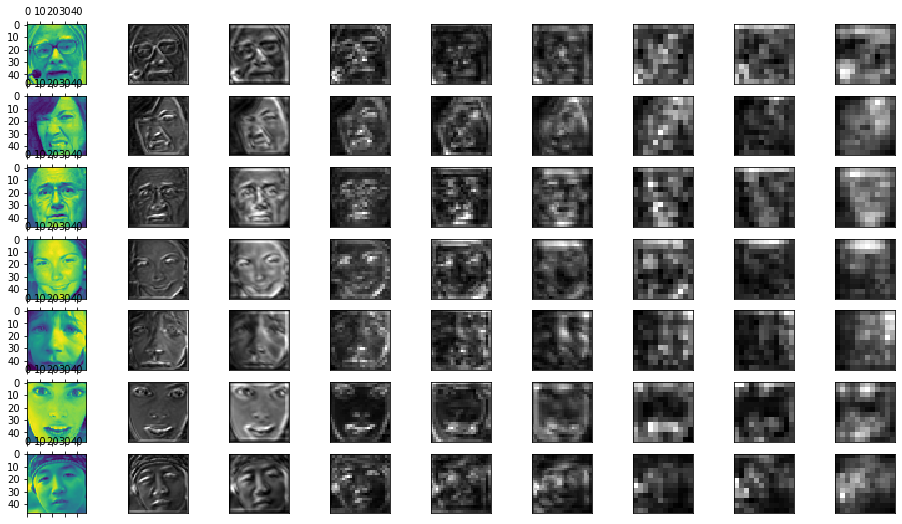

In [14]:


model_eval(model,X_test,y_test,label_map,visx,visy)


#### Second Model: Make layer simpler to see if it improves my model

In [16]:
model1 = Sequential()
input_shape = (48,48,1)
model1.add(Conv2D(512, (7, 7), input_shape=input_shape,activation='relu', padding='same'))
model1.add(Conv2D(512, (7, 7), input_shape=input_shape,activation='relu', padding='same'))

model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))



model1.add(Flatten())
model1.add(Activation('relu'))
model1.add(Dense(64))
model1.add(Dense(7))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')




In [144]:
model1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1010/1010 [==============================] - 343s 340ms/step - loss: 2.3374 - accuracy: 0.3036 - val_loss: 1.6812 - val_accuracy: 0.3480
Epoch 2/10
1010/1010 [==============================] - 343s 340ms/step - loss: 1.5607 - accuracy: 0.4062 - val_loss: 1.8001 - val_accuracy: 0.2931
Epoch 3/10
1010/1010 [==============================] - 343s 340ms/step - loss: 1.4819 - accuracy: 0.4391 - val_loss: 1.6102 - val_accuracy: 0.3870
Epoch 4/10
1010/1010 [==============================] - 343s 340ms/step - loss: 1.4242 - accuracy: 0.4636 - val_loss: 1.5573 - val_accuracy: 0.4157
Epoch 5/10
1010/1010 [==============================] - 343s 339ms/step - loss: 1.3811 - accuracy: 0.4790 - val_loss: 1.5147 - val_accuracy: 0.4444
Epoch 6/10
1010/1010 [==============================] - 343s 339ms/step - loss: 1.3399 - accuracy: 0.4937 - val_loss: 3.3133 - val_accuracy: 0.1711
Epoch 7/10
1010/1010 [==============================] - 343s 339ms/step - loss: 1.3026 - accuracy: 0.5147 - val_

In [17]:
# model1.save_weights('model1')
model1.load_weights('model1')

['conv2d_6', 'conv2d_7', 'max_pooling2d_3']


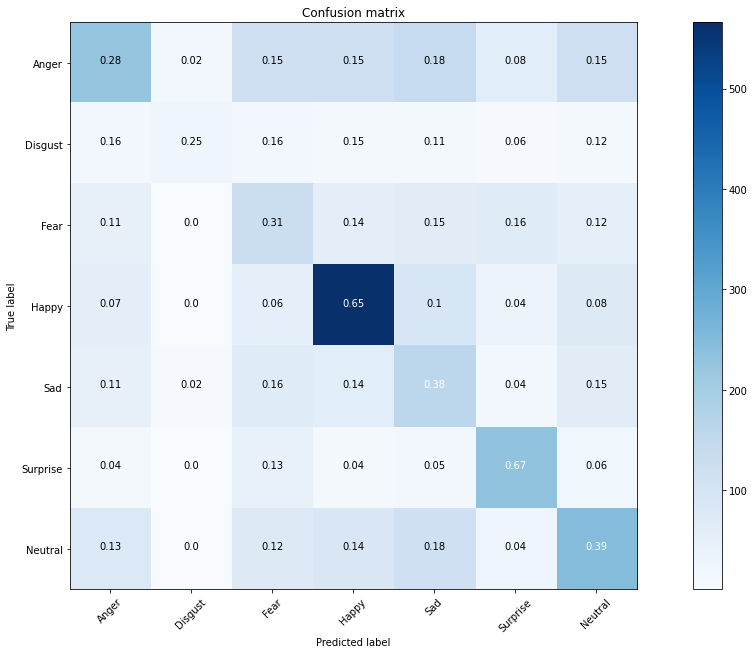

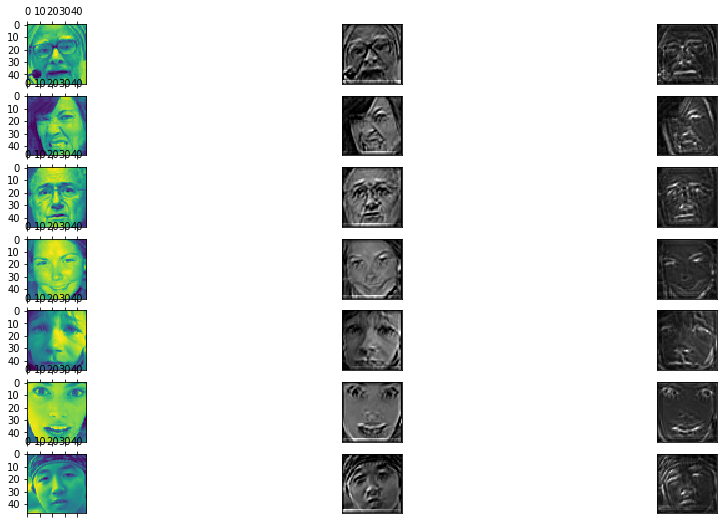

In [18]:
model_eval(model1,X_test,y_test,label_map,visx,visy)


Happiness predicted well, surprise predictd well, rest are all pretty low. 

## Third Model: Let's see if we can make another layer 

In [19]:
model2 = Sequential()
input_shape = (48,48,1)
model2.add(Conv2D(64, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3)))


model2.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))



model2.add(Flatten())



model2.add(Activation('relu'))
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dense(7))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [20]:
model2.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
1010/1010 [==============================] - 4s 4ms/step - loss: 1.5927 - accuracy: 0.3799 - val_loss: 1.4683 - val_accuracy: 0.4296
Epoch 2/15
1010/1010 [==============================] - 4s 4ms/step - loss: 1.3549 - accuracy: 0.4849 - val_loss: 1.3108 - val_accuracy: 0.4974
Epoch 3/15
1010/1010 [==============================] - 4s 4ms/step - loss: 1.2486 - accuracy: 0.5253 - val_loss: 1.2483 - val_accuracy: 0.5261
Epoch 4/15
1010/1010 [==============================] - 4s 4ms/step - loss: 1.1760 - accuracy: 0.5535 - val_loss: 1.2287 - val_accuracy: 0.5311
Epoch 5/15
1010/1010 [==============================] - 4s 4ms/step - loss: 1.1170 - accuracy: 0.5781 - val_loss: 1.1976 - val_accuracy: 0.5411
Epoch 6/15
1010/1010 [==============================] - 4s 4ms/step - loss: 1.0639 - accuracy: 0.6002 - val_loss: 1.2137 - val_accuracy: 0.5447
Epoch 7/15
1010/1010 [==============================] - 4s 4ms/step - loss: 1.0050 - accuracy: 0.6253 - val_loss: 1.2198 - val_accuracy:

['conv2d_8', 'max_pooling2d_4', 'conv2d_9', 'max_pooling2d_5']


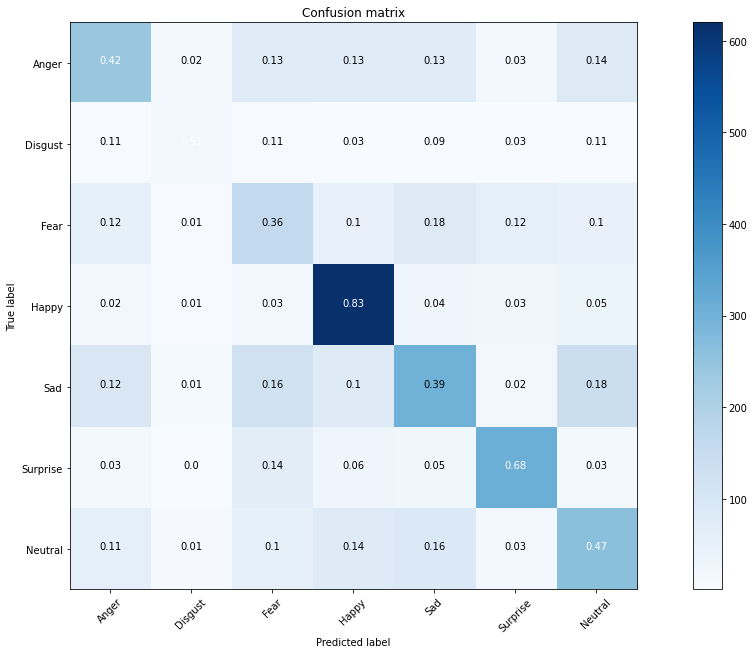

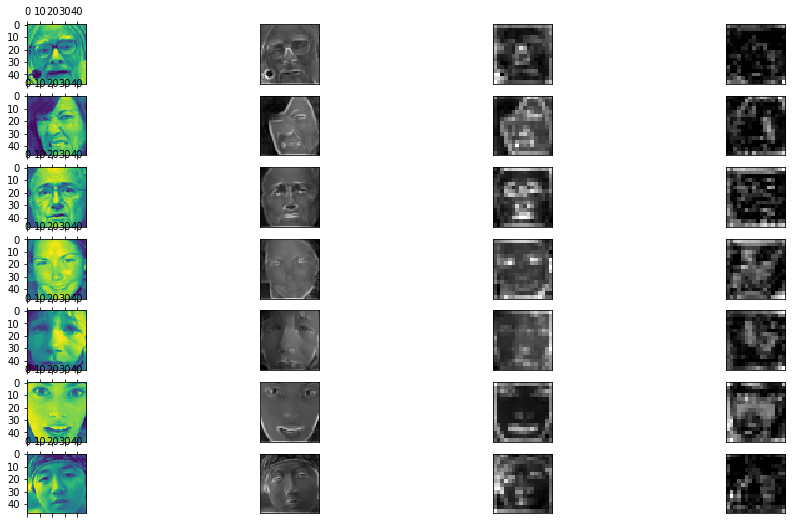

In [21]:
# model2.save_weights('model2')
model2.load_weights('model2')

model_eval(model2,X_test,y_test,label_map,visx,visy)


Happiness still predicted well but not as well so our prediction decreased than the previous model. 

In [24]:
model3 = Sequential()
input_shape = (48,48,1)
model3.add(Conv2D(256, (2, 2),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(256, (2, 2),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))


model3.add(Flatten())

model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dense(7))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [66]:
model3.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))



Epoch 1/10
1010/1010 [==============================] - 8s 8ms/step - loss: 1.5789 - accuracy: 0.3788 - val_loss: 1.4235 - val_accuracy: 0.4444
Epoch 2/10
1010/1010 [==============================] - 8s 8ms/step - loss: 1.3584 - accuracy: 0.4756 - val_loss: 1.3500 - val_accuracy: 0.4790
Epoch 3/10
1010/1010 [==============================] - 8s 8ms/step - loss: 1.2375 - accuracy: 0.5265 - val_loss: 1.2887 - val_accuracy: 0.5068
Epoch 4/10
1010/1010 [==============================] - 8s 8ms/step - loss: 1.1282 - accuracy: 0.5725 - val_loss: 1.2305 - val_accuracy: 0.5394
Epoch 5/10
1010/1010 [==============================] - 8s 8ms/step - loss: 1.0042 - accuracy: 0.6263 - val_loss: 1.2729 - val_accuracy: 0.5372
Epoch 6/10
1010/1010 [==============================] - 8s 8ms/step - loss: 0.8640 - accuracy: 0.6797 - val_loss: 1.3169 - val_accuracy: 0.5280
Epoch 7/10
1010/1010 [==============================] - 8s 8ms/step - loss: 0.7174 - accuracy: 0.7342 - val_loss: 1.4204 - val_accuracy:

['conv2d_12', 'max_pooling2d_8', 'conv2d_13', 'max_pooling2d_9']


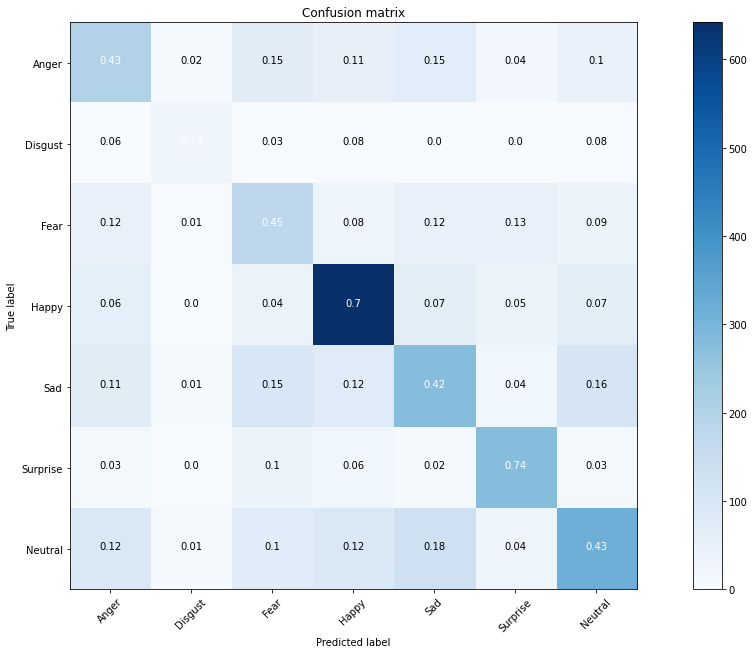

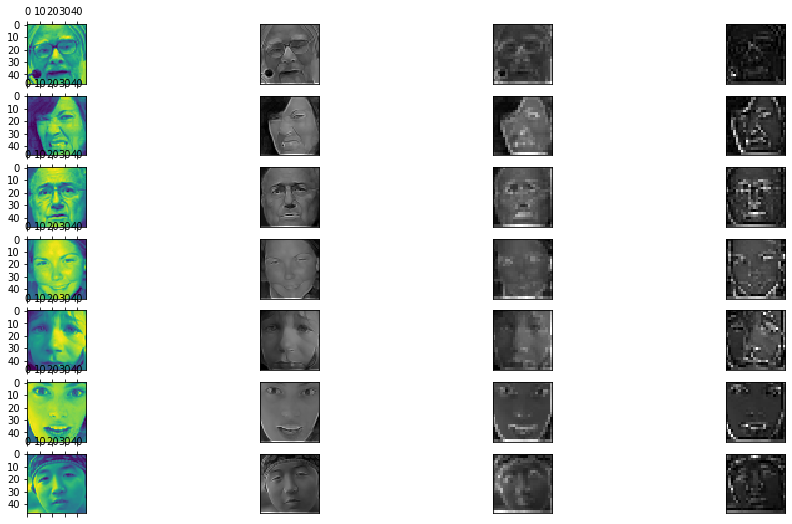

In [25]:
model3.load_weights('model3')
# model3.save_weights('model3')
model_eval(model3,X_test,y_test,label_map,visx,visy)


Still do not have a big difference from other models. Let's keep trying

## Model 4:

In [26]:
model4 = Sequential()
input_shape = (48,48,1)
model4.add(Conv2D(64, (2, 2), input_shape=input_shape,activation='relu', padding='same'))
model4.add(Conv2D(64, (2, 2), input_shape=input_shape,activation='relu', padding='same'))
model4.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(128, (2, 2),activation='relu',padding='same'))
model4.add(Conv2D(128, (4, 4),activation='relu',padding='same'))
model4.add(Conv2D(128, (2, 2),activation='relu',padding='same'))

model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))


model4.add(Flatten())



model4.add(Activation('relu'))
model4.add(Dense(250))

model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dense(64))
model4.add(Activation('relu'))
model4.add(Dense(7))
model4.add(Activation('softmax'))

model4.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [74]:
model4.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
1010/1010 [==============================] - 11s 11ms/step - loss: 1.5267 - accuracy: 0.4030 - val_loss: 1.7913 - val_accuracy: 0.3502
Epoch 2/10
1010/1010 [==============================] - 11s 11ms/step - loss: 1.2257 - accuracy: 0.5321 - val_loss: 1.3240 - val_accuracy: 0.4770
Epoch 3/10
1010/1010 [==============================] - 11s 11ms/step - loss: 1.0457 - accuracy: 0.6094 - val_loss: 1.3054 - val_accuracy: 0.5063
Epoch 4/10
1010/1010 [==============================] - 11s 11ms/step - loss: 0.8561 - accuracy: 0.6838 - val_loss: 1.1817 - val_accuracy: 0.5787
Epoch 5/10
1010/1010 [==============================] - 11s 11ms/step - loss: 0.6371 - accuracy: 0.7701 - val_loss: 1.2743 - val_accuracy: 0.5768
Epoch 6/10
1010/1010 [==============================] - 11s 11ms/step - loss: 0.4129 - accuracy: 0.8568 - val_loss: 1.6676 - val_accuracy: 0.5397
Epoch 7/10
1010/1010 [==============================] - 11s 11ms/step - loss: 0.2502 - accuracy: 0.9179 - val_loss: 1.6948 -

In [27]:
# model4.save_weights('model4')
model4.load_weights('model4')


['conv2d_14', 'conv2d_15', 'conv2d_16', 'max_pooling2d_10', 'conv2d_17', 'conv2d_18', 'conv2d_19', 'max_pooling2d_11']


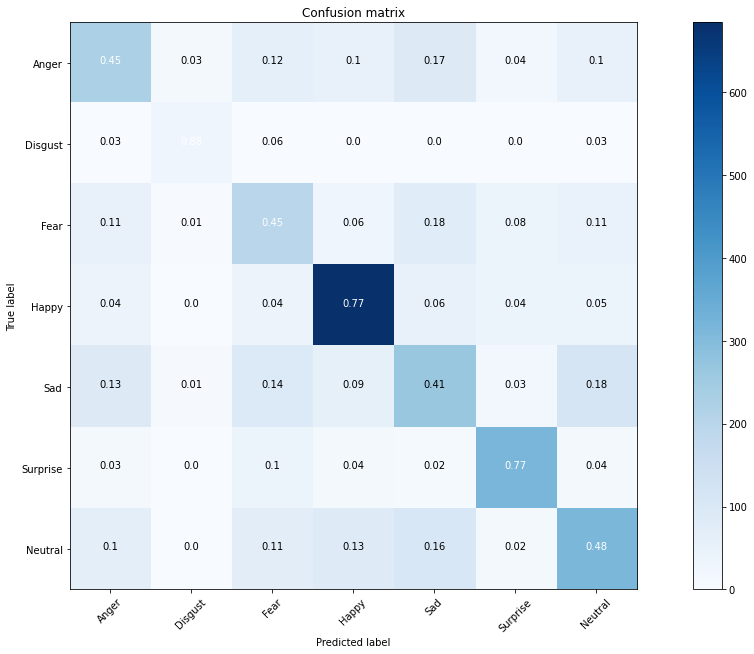

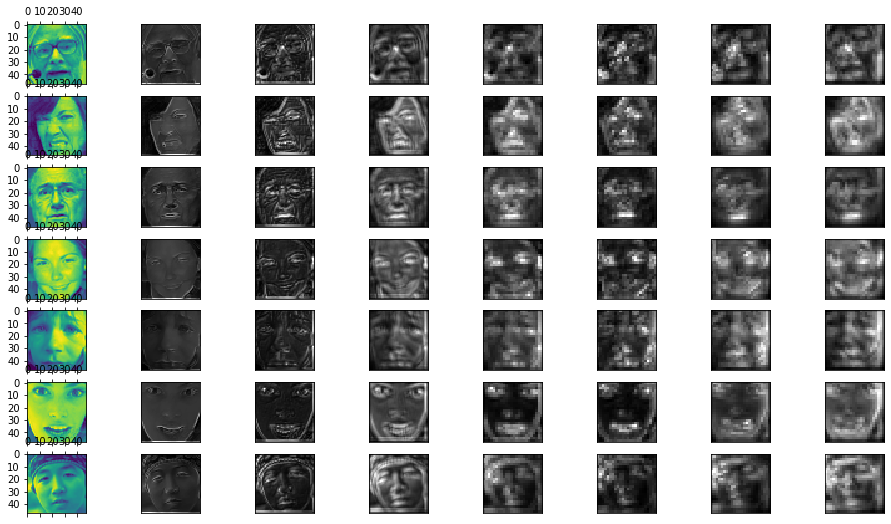

In [28]:
model_eval(model4,X_test,y_test,label_map,visx,visy)


In [29]:
model5 = Sequential()
input_shape = (48,48,1)
model5.add(Conv2D(512, (2, 2), input_shape=input_shape,activation='relu', padding='same'))
model5.add(Conv2D(256, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
model5.add(Conv2D(128, (4, 4),activation='relu',padding='same'))
model5.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(512, (2, 2), input_shape=input_shape,activation='relu', padding='same'))
model5.add(Conv2D(256, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
model5.add(Conv2D(128, (4, 4),activation='relu',padding='same'))
model5.add(Conv2D(64, (5, 5),activation='relu',padding='same'))

model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))


model5.add(Flatten())


model5.add(Dense(125))
model5.add(BatchNormalization())
model5.add(Activation('relu'))

model5.add(Dense(15))
model5.add(BatchNormalization())
model5.add(Activation('relu'))

model5.add(Dense(7))
model5.add(BatchNormalization())
model5.add(Activation('softmax'))

model5.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [79]:
model5.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
1010/1010 [==============================] - 44s 43ms/step - loss: 1.7679 - accuracy: 0.3123 - val_loss: 1.6775 - val_accuracy: 0.3745
Epoch 2/10
1010/1010 [==============================] - 43s 43ms/step - loss: 1.5215 - accuracy: 0.4140 - val_loss: 1.5012 - val_accuracy: 0.4171
Epoch 3/10
1010/1010 [==============================] - 43s 43ms/step - loss: 1.3514 - accuracy: 0.4864 - val_loss: 1.3482 - val_accuracy: 0.4884
Epoch 4/10
1010/1010 [==============================] - 43s 43ms/step - loss: 1.2255 - accuracy: 0.5416 - val_loss: 1.2750 - val_accuracy: 0.5138
Epoch 5/10
1010/1010 [==============================] - 43s 43ms/step - loss: 1.1082 - accuracy: 0.5912 - val_loss: 1.3598 - val_accuracy: 0.4915
Epoch 6/10
1010/1010 [==============================] - 43s 43ms/step - loss: 0.9792 - accuracy: 0.6441 - val_loss: 1.2820 - val_accuracy: 0.5302
Epoch 7/10
1010/1010 [==============================] - 43s 43ms/step - loss: 0.8372 - accuracy: 0.7028 - val_loss: 1.2803 -

['conv2d_20', 'conv2d_21', 'conv2d_22', 'conv2d_23', 'max_pooling2d_12', 'conv2d_24', 'conv2d_25', 'conv2d_26', 'conv2d_27', 'max_pooling2d_13']


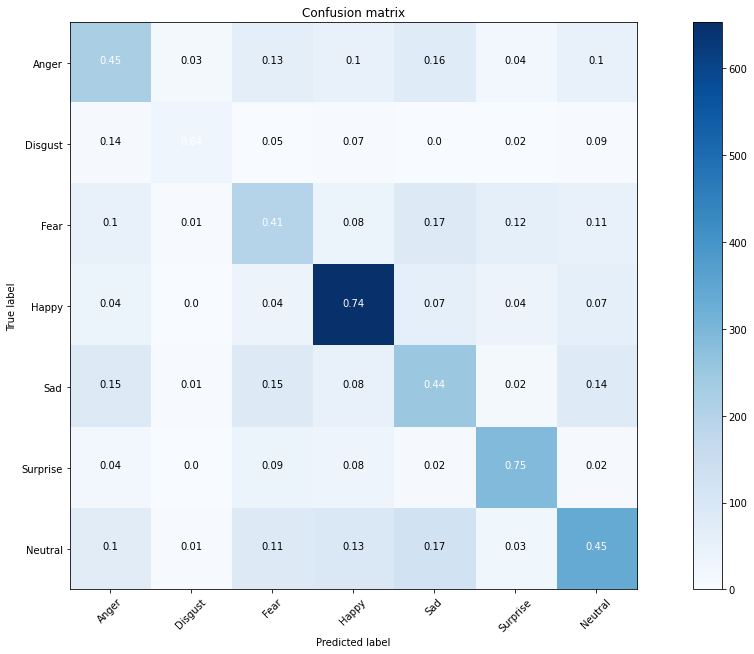

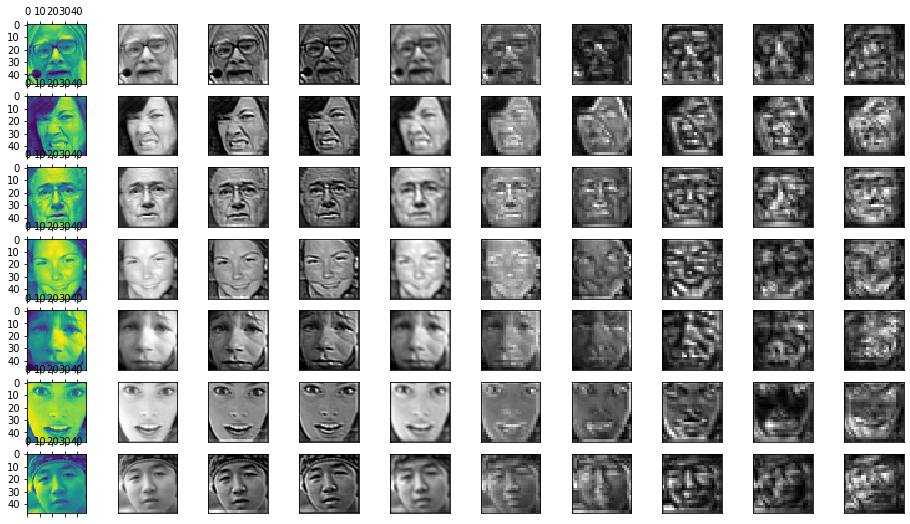

In [30]:
# model5.save_weights('model5')
model5.load_weights('model5')

model_eval(model5,X_test,y_test,label_map,visx,visy)


In [32]:
model6 = Sequential()
input_shape = (48,48,1)
model6.add(Conv2D(512, (2, 2), input_shape=input_shape,activation='relu', padding='same'))
model6.add(Conv2D(512, (3, 3), input_shape=input_shape,activation='relu', padding='same'))

model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.2))

model6.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.2))

model6.add(Conv2D(512, (2, 2),activation='relu',padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.2))

model6.add(Flatten())
model6.add(BatchNormalization())

model6.add(Dense(500))
model6.add(Activation('relu'))
model6.add(Dropout(0.5))

model6.add(Dense(500))
model6.add(Activation('relu'))
model6.add(Dropout(0.5))

model6.add(BatchNormalization())

model6.add(Dense(500))
model6.add(Activation('relu'))
model6.add(Dropout(0.3))

model6.add(BatchNormalization())


model6.add(Dense(125))
model6.add(Activation('relu'))
model6.add(Dropout(0.3))



model6.add(Dense(7))
model6.add(Activation('softmax'))

model6.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [85]:
model6.fit(X_train,y_train,epochs=15,batch_size=100,validation_data=(X_test,y_test))


Epoch 1/10
323/323 [==============================] - 37s 115ms/step - loss: 2.0051 - accuracy: 0.2149 - val_loss: 1.7976 - val_accuracy: 0.2561
Epoch 2/10
323/323 [==============================] - 36s 110ms/step - loss: 1.8165 - accuracy: 0.2426 - val_loss: 1.8055 - val_accuracy: 0.2313
Epoch 3/10
323/323 [==============================] - 36s 110ms/step - loss: 1.7756 - accuracy: 0.2709 - val_loss: 1.8240 - val_accuracy: 0.2260
Epoch 4/10
323/323 [==============================] - 36s 110ms/step - loss: 1.6998 - accuracy: 0.3165 - val_loss: 1.7810 - val_accuracy: 0.2471
Epoch 5/10
323/323 [==============================] - 36s 110ms/step - loss: 1.5341 - accuracy: 0.3969 - val_loss: 1.5979 - val_accuracy: 0.4071
Epoch 6/10
323/323 [==============================] - 36s 110ms/step - loss: 1.3828 - accuracy: 0.4678 - val_loss: 1.5572 - val_accuracy: 0.3990
Epoch 7/10
323/323 [==============================] - 36s 110ms/step - loss: 1.2907 - accuracy: 0.5059 - val_loss: 1.2167 - val_ac

['conv2d_28', 'conv2d_29', 'max_pooling2d_14', 'conv2d_30', 'max_pooling2d_15', 'conv2d_31', 'max_pooling2d_16']


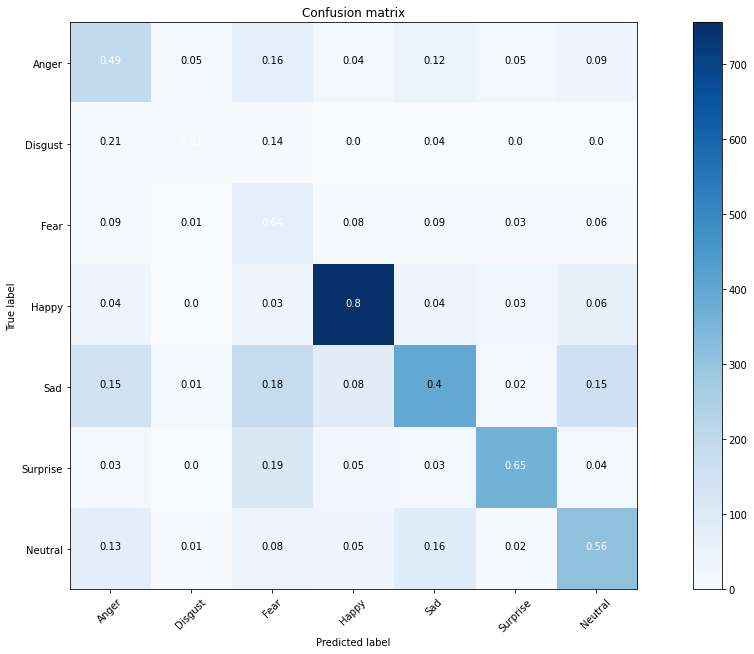

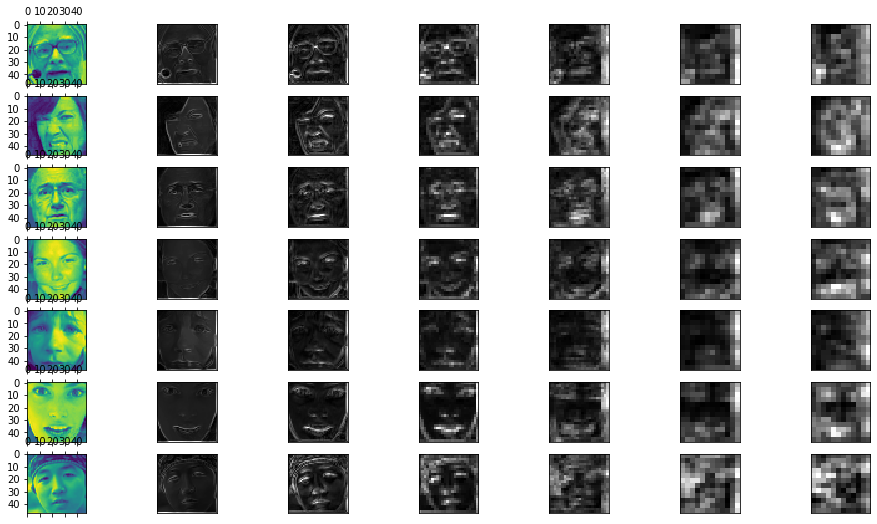

In [33]:
# model6.save_weights('model6')
model6.load_weights('model6')

model_eval(model6,X_test,y_test,label_map,visx,visy)


In [37]:
model7 = Sequential()
input_shape = (48,48,1)
model7.add(Conv2D(512, (2, 2), input_shape=input_shape,activation='relu', padding='same'))

model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model7.add(Dropout(0.2))
model7.add(Conv2D(128, (6, 6), activation='relu', padding='same'))
model7.add(Dropout(0.2))

model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(128, (2, 2),activation='relu',padding='same'))
model7.add(Dropout(0.2))

model7.add(Conv2D(128, (4, 4), activation='relu', padding='same'))
model7.add(Dropout(0.2))
model7.add(BatchNormalization())


model7.add(Flatten())
model7.add(BatchNormalization())


model7.add(Dense(900))
model7.add(Activation('relu'))
model7.add(Dropout(0.2))

model7.add(BatchNormalization())

model7.add(Dense(500))
model7.add(Activation('relu'))
model7.add(Dropout(0.25))

model7.add(BatchNormalization())


model7.add(Dense(500))
model7.add(Activation('relu'))
model7.add(Dropout(0.2))

model7.add(BatchNormalization())

model7.add(Dense(500))
model7.add(Activation('relu'))
model7.add(Dropout(0.2))

model7.add(BatchNormalization())

model7.add(Dense(500))
model7.add(Activation('relu'))
model7.add(Dropout(0.2))

model7.add(BatchNormalization())

model7.add(Dense(500))
model7.add(Activation('relu'))
model7.add(Dropout(0.25))

model7.add(BatchNormalization())


model7.add(Dense(500))
model7.add(Activation('relu'))
model7.add(Dropout(0.2))

model7.add(BatchNormalization())

model7.add(Dense(100))
model7.add(Activation('relu'))
model7.add(Dropout(0.2))

model7.add(BatchNormalization())

model7.add(Dense(50))
model7.add(Activation('relu'))
model7.add(Dropout(0.1))

model7.add(BatchNormalization())

model7.add(Dense(25))
model7.add(Activation('relu'))
model7.add(Dropout(0.1))

model7.add(Dense(7))
model7.add(Activation('softmax'))

model7.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [38]:
model7.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))


Epoch 1/15
1010/1010 [==============================] - 27s 27ms/step - loss: 1.8706 - accuracy: 0.2295 - val_loss: 1.9068 - val_accuracy: 0.2246
Epoch 2/15
1010/1010 [==============================] - 26s 26ms/step - loss: 1.7772 - accuracy: 0.2645 - val_loss: 1.8296 - val_accuracy: 0.2708
Epoch 3/15
1010/1010 [==============================] - 26s 26ms/step - loss: 1.6968 - accuracy: 0.3201 - val_loss: 2.0340 - val_accuracy: 0.2329
Epoch 4/15
1010/1010 [==============================] - 26s 26ms/step - loss: 1.6232 - accuracy: 0.3571 - val_loss: 1.5263 - val_accuracy: 0.3884
Epoch 5/15
1010/1010 [==============================] - 26s 26ms/step - loss: 1.5750 - accuracy: 0.3776 - val_loss: 1.5035 - val_accuracy: 0.4185
Epoch 6/15
1010/1010 [==============================] - 26s 26ms/step - loss: 1.5371 - accuracy: 0.3953 - val_loss: 1.6175 - val_accuracy: 0.3809
Epoch 7/15
1010/1010 [==============================] - 26s 26ms/step - loss: 1.5020 - accuracy: 0.4159 - val_loss: 1.4353 -

/content/drive/MyDrive/ColabNotebooks/Emoition-classification-from-facial-expression/Functions.py:85: RuntimeWarning: invalid value encountered in true_divide
  cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)


['conv2d_42', 'max_pooling2d_21', 'conv2d_43', 'conv2d_44', 'max_pooling2d_22', 'conv2d_45', 'conv2d_46']


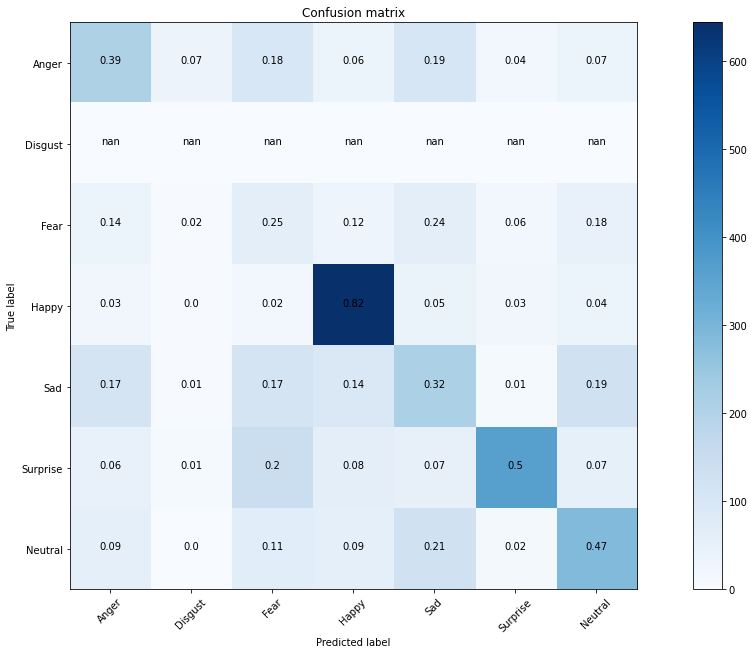

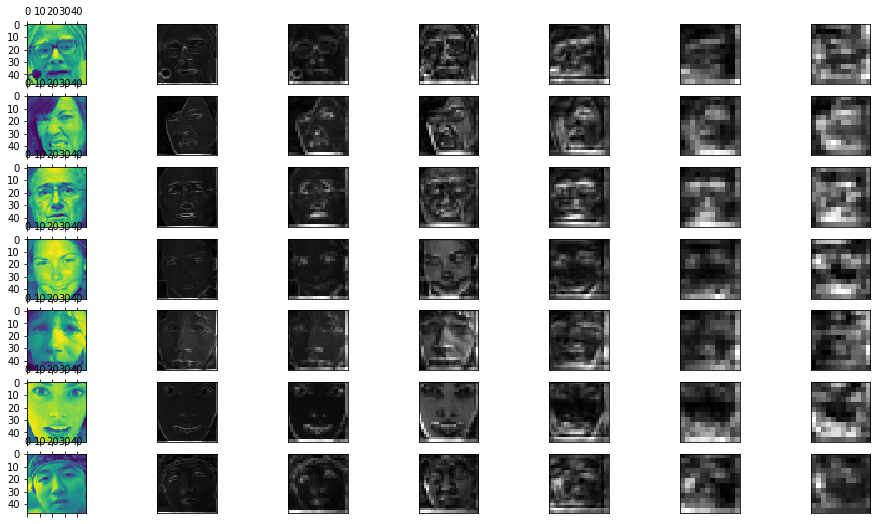

In [39]:
model7.save_weights('model7')
# model7.load_weights('model7')

model_eval(model7,X_test,y_test,label_map,visx,visy)


In [40]:
model8 = Sequential()
input_shape = (48,48,1)
model8.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model8.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model8.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))

model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
model8.add(Conv2D(256, (3, 3),activation='relu',padding='same'))

model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(1024, (3, 3),activation='relu',padding='same'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Flatten())
model8.add(BatchNormalization())


model8.add(Dense(999))
model8.add(Activation('relu'))
model8.add(Dropout(0.3))
model8.add(BatchNormalization())

model8.add(Dense(750))
model8.add(Activation('relu'))
model8.add(Dropout(0.3))

model8.add(BatchNormalization())


model8.add(Dense(500))
model8.add(Activation('relu'))
model8.add(Dropout(0.2))

model8.add(BatchNormalization())

model8.add(Dense(100))
model8.add(Activation('relu'))
model8.add(Dropout(0.2))

model8.add(BatchNormalization())

model8.add(Dense(25))
model8.add(Activation('relu'))
model8.add(Dropout(0.1))

model8.add(Dense(7))
model8.add(Activation('softmax'))

model8.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [169]:
model8.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))


Epoch 1/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.1981 - accuracy: 0.5508 - val_loss: 1.8121 - val_accuracy: 0.4700
Epoch 2/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.2215 - accuracy: 0.5376 - val_loss: 2.7133 - val_accuracy: 0.4709
Epoch 3/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.1868 - accuracy: 0.5541 - val_loss: 14.3796 - val_accuracy: 0.5199
Epoch 4/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.1769 - accuracy: 0.5600 - val_loss: 33.1812 - val_accuracy: 0.5049
Epoch 5/100
1010/1010 [==============================] - 37s 36ms/step - loss: 1.1255 - accuracy: 0.5819 - val_loss: 2.7498 - val_accuracy: 0.4837
Epoch 6/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.0933 - accuracy: 0.5926 - val_loss: 292.3008 - val_accuracy: 0.2728
Epoch 7/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.1462 - accuracy: 0.5732 - val_los

['conv2d_47', 'conv2d_48', 'conv2d_49', 'max_pooling2d_23', 'conv2d_50', 'conv2d_51', 'max_pooling2d_24', 'conv2d_52', 'max_pooling2d_25']


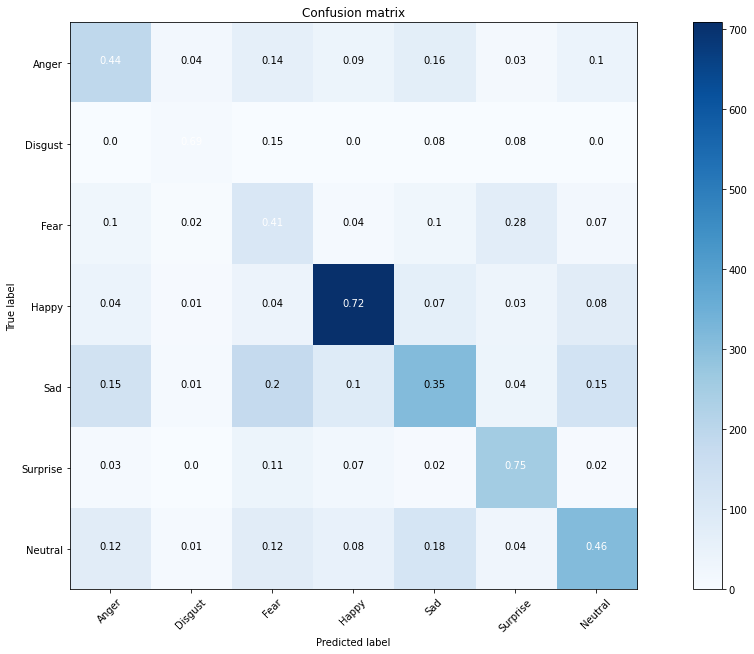

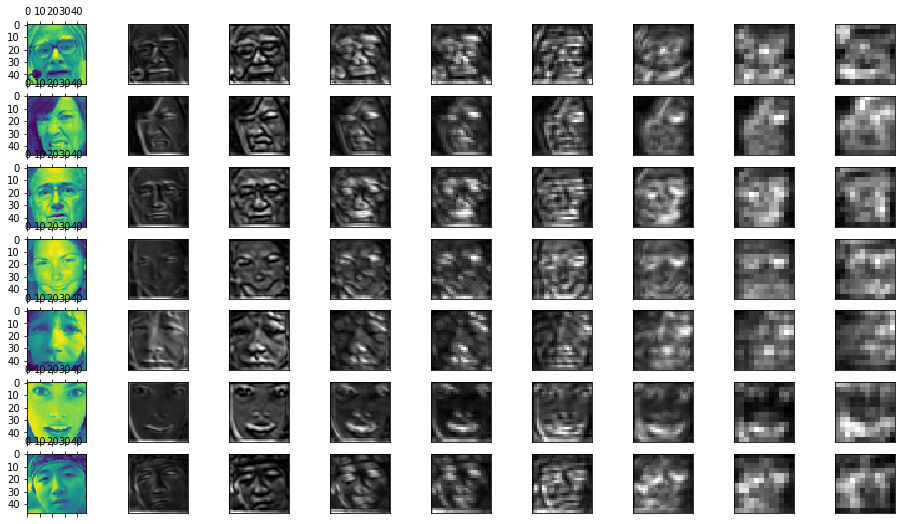

In [41]:
# model8.save_weights('model8')
model8.load_weights('model8')

model_eval(model8,X_test,y_test,label_map,visx,visy)


In [45]:

final_model = Sequential()
final_model = Sequential()
input_shape = (48,48,1)
final_model.add(Conv2D(256, (2, 2), input_shape=input_shape,activation='relu', padding='same'))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.2))

final_model.add(Conv2D(256, (2, 2), input_shape=input_shape,activation='relu', padding='same'))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.2))

final_model.add(Conv2D(256, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
final_model.add(Dropout(0.2))

final_model.add(BatchNormalization())
final_model.add(MaxPooling2D(pool_size=(2, 2)))

final_model.add(Conv2D(512, (2, 2),activation='relu',padding='same'))
final_model.add(Dropout(0.2))

final_model.add(BatchNormalization())

final_model.add(Conv2D(512, (4, 4),activation='relu',padding='same'))
final_model.add(Dropout(0.2))

final_model.add(BatchNormalization())

final_model.add(Conv2D(512, (2, 2),activation='relu',padding='same'))
final_model.add(Dropout(0.2))


final_model.add(BatchNormalization())
final_model.add(MaxPooling2D(pool_size=(2, 2)))


final_model.add(Flatten())
final_model.add(Dense(750))
final_model.add(Activation('relu'))
final_model.add(Dropout(0.3))

final_model.add(Dense(750))
final_model.add(Activation('relu'))
final_model.add(Dropout(0.3))

final_model.add(Dense(750))
final_model.add(Activation('relu'))
final_model.add(Dropout(0.3))

final_model.add(Activation('relu'))
final_model.add(Dense(250))
final_model.add(Dropout(0.2))

final_model.add(BatchNormalization())
final_model.add(Activation('relu'))
final_model.add(Dense(64))
final_model.add(Activation('relu'))
final_model.add(Dense(7))
final_model.add(Activation('softmax'))

final_model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')




In [ ]:
final_model.fit(X,Y,epochs=20,batch_size=100)


['conv2d_68', 'conv2d_69', 'conv2d_70', 'max_pooling2d_31', 'conv2d_71', 'conv2d_72', 'conv2d_73', 'max_pooling2d_32']


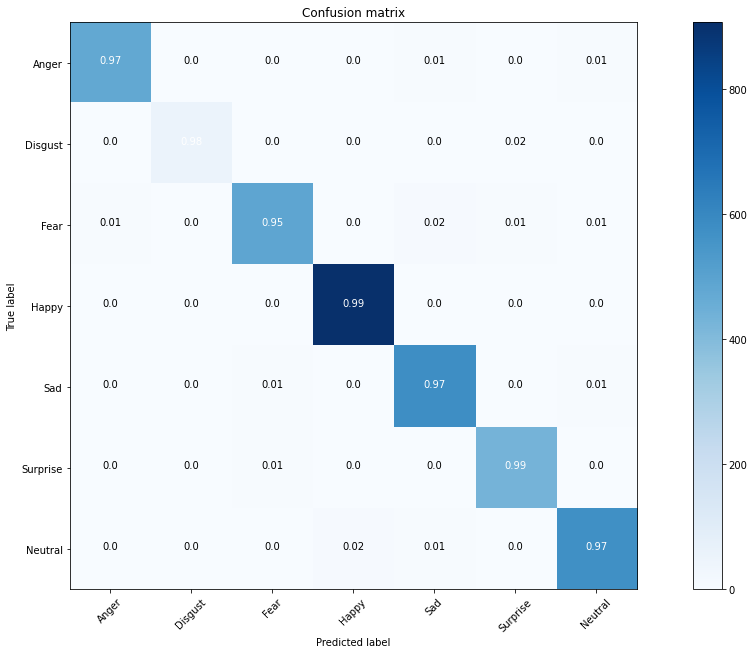

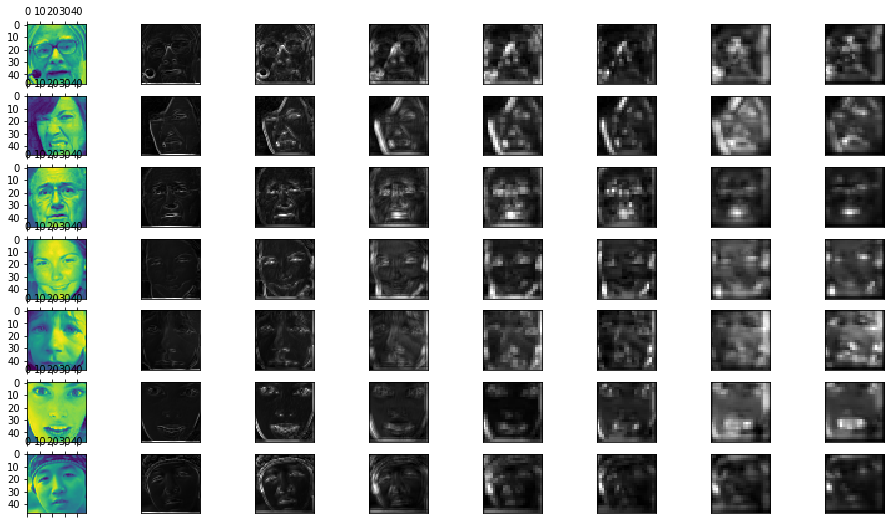

In [47]:
final_model.save_weights('FinalModel')
model_eval(final_model,X_test,y_test,label_map,visx,visy)


In [ ]:
#test it on a picture and use visualiztaions to see what the model sees
#explain the problem with testing it on your self
#bring in haar cascade classifier
#show the haar cascade classifier finding your face and multiple faces
#use the cascade classifier to predict on your face
#use both to predict on you face and show the visualizations
#talk about context and body language
#bring in and demonstrate pose estimator
#show video of your program predicting in realtime
#discuss failures and next steps